##Machine Translation Using a Seq2Seq Architecture
© 2024, Zaka AI, Inc. All Rights Reserved.

---
The goal of this colab is to get you more familiar with the Seq2Seq models and their challenges. For this reason, you will be working on machine translation problem where we would have a sentence as input (in english), and the output is gonna be the translated sentence (in french). So just like what happens with Google Translate.


**Just to give you a heads up:** We won't be having a model performing like Google translate, but at least we will have an idea about how Google Translate works and the challenges that exist with a translation problem.  

## Importing Libraries

We start by importing numpy and pandas and then we can add the rest

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Cloning to my drive

%cd /content/drive/MyDrive/Colab Notebooks

!git clone https://github.com/zaka-ai/machine_learning_certification.git

/content/drive/MyDrive/Colab Notebooks
Cloning into 'machine_learning_certification'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 43 (delta 10), reused 10 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (43/43), 43.23 MiB | 13.24 MiB/s, done.
Resolving deltas: 100% (10/10), done.
Updating files: 100% (15/15), done.


We clone the github repository where our data exists. Here is the github link: https://github.com/zaka-ai/machine_learning_certification/tree/main/Challenge%207

## Getting the data

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/machine_learning_certification/Challenge 7

/content/drive/MyDrive/Colab Notebooks/machine_learning_certification/Challenge 7


We read the english sentences in a dataframe named "english", and the french sentences in a dataframe named "french"

In [ ]:
# Reading english data
english = pd.read_csv("en.csv", header=None)

english.head()

,0
0,"new jersey is sometimes quiet during autumn , ..."
1,the united states is usually chilly during jul...
2,"california is usually quiet during march , and..."
3,the united states is sometimes mild during jun...
4,"your least liked fruit is the grape , but my l..."


In [ ]:
# Reading french data
french = pd.read_csv("fr.csv", header=None)

french.head()

,0
0,new jersey est parfois calme pendant l' automn...
1,les états-unis est généralement froid en juill...
2,"california est généralement calme en mars , et..."
3,"les états-unis est parfois légère en juin , et..."
4,"votre moins aimé fruit est le raisin , mais mo..."


**How many sentences does each of the files contain?**

In [ ]:
# Using shape to get the number of rows
en_sent = english.shape[0]
print(f'Number of english sentences: {en_sent}')

fr_sent = french.shape[0]
print(f'Number of french sentences: {fr_sent}')

Number of english sentences: 137860
Number of french sentences: 137860


Now let us concatenate the 2 dataframes into one dataframe that we call **df** where one column has the english senetnces and the other has the french sentences

In [ ]:
# Concatenating the two DataFrames
df = pd.concat([english, french], axis=1)

df.head()

,0,0
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."


Let's name the columns as **English** and **French** so that we access them easier.

In [ ]:
# Naming the columns
df.columns = ["English", "French"]

df.head()

,English,French
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."


Pick a sentence and print it in both languages

In [ ]:
# I chose to print the last row
last_row = df.iloc[-1]

# Print the sentence in both languages
print("English Sentence:", last_row["English"])
print("French Sentence:", last_row["French"])

English Sentence: the orange is her favorite fruit , but the banana is your favorite .
French Sentence: l'orange est son fruit préféré , mais la banane est votre favori .


##Cleaning Data

The data that we have is almost clean as we can see, we just need to remove the punctuations inside of it.

In [ ]:
import re
import unicodedata

# Function to remove punctuation (keeping alphabetical characters and white spaces only)
def remove_punctuation(text):
    # Found a way to remove accents and keep the letter only (will help with french sentences)
    text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore').decode('utf-8')
    # without the accents, french and english have 26 letters
    return re.sub(r'[^a-zA-Z]', ' ', text)

# Applying the function to both english and french columns
df["English"] = df["English"].apply(remove_punctuation)
df["French"] = df["French"].apply(remove_punctuation)

Make sure that the punctuation is removed by printing the example that you printed earlier.

In [ ]:
last_row = df.iloc[-1]

print("English Sentence:", last_row["English"])
print("French Sentence:", last_row["French"])

English Sentence: the orange is her favorite fruit   but the banana is your favorite  
French Sentence: l orange est son fruit prefere   mais la banane est votre favori  


##Exploring the Data

Add a column **ENG Length** to the dataset that shows how many words does a sentence contain, and do the same for french in a column called **FR Length**

In [ ]:
# Adding a column for English sentence lengths (using the split function)
df["ENG Length"] = df["English"].apply(lambda x: len(x.split()))

df.head()

,English,French,ENG Length
0,new jersey is sometimes quiet during autumn ...,new jersey est parfois calme pendant l automn...,13
1,the united states is usually chilly during jul...,les etats unis est generalement froid en juill...,15
2,california is usually quiet during march and...,california est generalement calme en mars et...,13
3,the united states is sometimes mild during jun...,les etats unis est parfois legere en juin et...,14
4,your least liked fruit is the grape but my l...,votre moins aime fruit est le raisin mais mo...,14


In [ ]:
# Doing the same for french sentences
df["FR Length"] = df["French"].apply(lambda x: len(x.split()))

df.head()

,English,French,ENG Length,FR Length
0,new jersey is sometimes quiet during autumn ...,new jersey est parfois calme pendant l automn...,13,14
1,the united states is usually chilly during jul...,les etats unis est generalement froid en juill...,15,14
2,california is usually quiet during march and...,california est generalement calme en mars et...,13,13
3,the united states is sometimes mild during jun...,les etats unis est parfois legere en juin et...,14,14
4,your least liked fruit is the grape but my l...,votre moins aime fruit est le raisin mais mo...,14,14


Visualize the distribution of the lengths of english sentences and french sentences.

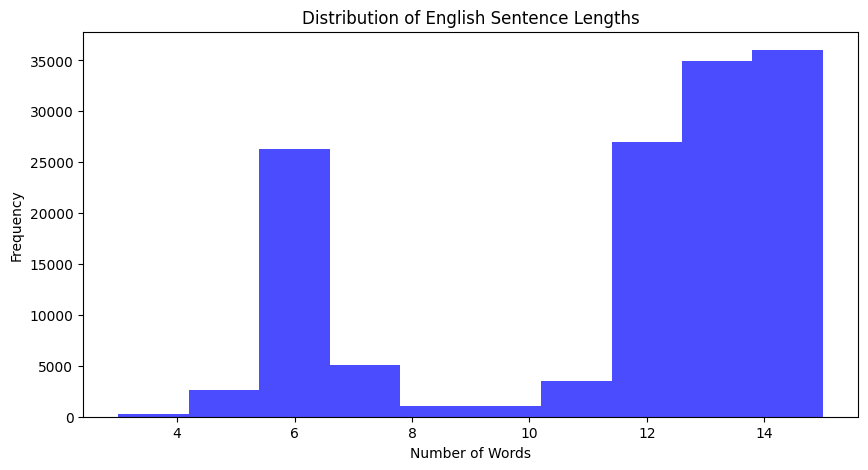

In [ ]:
import matplotlib.pyplot as plt

# Plotting the distribution of English sentence lengths
plt.figure(figsize=(10, 5))
plt.hist(df["ENG Length"], color='blue', alpha=0.7)
plt.title("Distribution of English Sentence Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

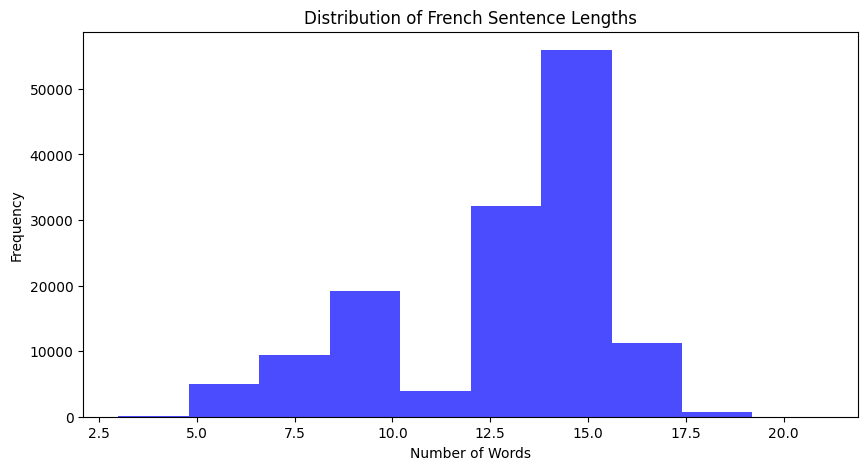

In [ ]:
# Plotting the distribution of French sentence lengths
plt.figure(figsize=(10, 5))
plt.hist(df["FR Length"], color='blue', alpha=0.7)
plt.title("Distribution of French Sentence Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

Get the maximum length of an english sentence and the maximum length of a french sentence.

In [ ]:
# Getting maximum length of an English sentence
max_eng_length = df["ENG Length"].max()

# Getting maximum length of a French sentence
max_fr_length = df["FR Length"].max()

# Printing the results
print("Maximum length of an English sentence:", max_eng_length)
print("Maximum length of a French sentence:", max_fr_length)

Maximum length of an English sentence: 15
Maximum length of a French sentence: 21


##Preprocessing the Data

In order for the data to be fed to the model, it has to be tokenized and padded.

####Tokenization

**To tokenize english and french sentences, we can use only one tokenizer. True or False?**

False

Tokenize the sentences that we have.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenizer for English
english_tokenizer = Tokenizer()
english_tokenizer.fit_on_texts(df["English"])  # Fit tokenizer on English sentences
english_sequences = english_tokenizer.texts_to_sequences(df["English"])

# Tokenizer for French
french_tokenizer = Tokenizer()
french_tokenizer.fit_on_texts(df["French"])  # Fit tokenizer on French sentences
french_sequences = french_tokenizer.texts_to_sequences(df["French"])

**How many unique words do we have in english and in french?**

In [ ]:
# Number of unique words in English
english_vocab_size = len(english_tokenizer.word_index)
print("Number of unique words in English:", english_vocab_size)

# Number of unique words in French
french_vocab_size = len(french_tokenizer.word_index)
print("Number of unique words in French:", french_vocab_size)

Number of unique words in English: 200
Number of unique words in French: 325


####Padding

**What should be the length of the sequences that we have after padding?**

The length of the sequences after padding will be equal to the maximum sentence length for each language.

Perform padding on the sequences that we have.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Padding English sequences
english_padded = pad_sequences(english_sequences, maxlen=max_eng_length, padding='post')

# Doing the same for french
french_padded = pad_sequences(french_sequences, maxlen=max_fr_length, padding='post')

# Printing the first padded English and French sequences to check
print("First English Padded Sequence:", english_padded[0])
print("First French Padded Sequence:", french_padded[0])

First English Padded Sequence: [17 23  1  8 67  4 39  7  3  1 55  2 44  0  0]
First French Padded Sequence: [ 35  34   1  10  66  37   8  18   6   3   1 112   2  50   0   0   0   0
   0   0   0]


##Modeling

After preprrocessing the data, we can build our model. Start by building a baseline architecture relying on one directional RNNs, LSTMs, or GRUs. It will be good to lookup how to build Seq2Seq models, there are some new layers that will help you like RepeatVector and TimeDistributed.

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, GRU, Dense, RepeatVector, TimeDistributed

# Parameters
english_vocab_size = 200  # Number of unique words in English (+1 for padding)
french_vocab_size = 325   # Number of unique words in French (+1 for padding)
embedding_dim = 64        # Embedding vector size
latent_dim = 256          # Latent dimension of LSTM/GRU
max_eng_length = 15       # Maximum length of English sequences
max_fr_length = 21        # Maximum length of French sequences

# Encoder
encoder_inputs = Input(shape=(max_eng_length,))
encoder_embedding = Embedding(input_dim=english_vocab_size+1, output_dim=embedding_dim, input_length=max_eng_length)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True)
_, encoder_h, encoder_c = encoder_lstm(encoder_embedding)

# Decoder
decoder_inputs = RepeatVector(max_fr_length)(encoder_h)  # Repeat context vector
decoder_lstm = LSTM(latent_dim, return_sequences=True)(decoder_inputs)
decoder_outputs = TimeDistributed(Dense(french_vocab_size+1, activation='softmax'))(decoder_lstm)

# Build the Model
model = Model(inputs=encoder_inputs, outputs=decoder_outputs)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Compile and train the model.
**FYI:** While specifying the architecture of your model and the number of epochs for training, keeep in your mind that your model might take A LOT of time to train.

In [ ]:
# Compiling the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 64)              │          12,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ [(None, 256), (None, 256),  │         328,704 │
│                                      │ (None, 256)]                │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 21, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 21, 256)             │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 21, 326)             │          83,782 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 950,662 (3.63 MB)

 Trainable params: 950,662 (3.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Spliting the data first
from sklearn.model_selection import train_test_split

# Using the padded sequences for English and French
X = english_padded
Y = french_padded

# Spliting into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Converting to NumPy arrays (optional, for TensorFlow/Keras compatibility)
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

# Verify the shapes
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (110288, 15)
Shape of Y_train: (110288, 21)
Shape of X_test: (27572, 15)
Shape of Y_test: (27572, 21)


In [ ]:
# Trianing
history = model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 34s 14ms/step - accuracy: 0.5591 - loss: 1.9527 - val_accuracy: 0.7191 - val_loss: 0.9242
Epoch 2/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 36s 15ms/step - accuracy: 0.7420 - loss: 0.8287 - val_accuracy: 0.7935 - val_loss: 0.6302
Epoch 3/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8109 - loss: 0.5796 - val_accuracy: 0.8674 - val_loss: 0.4050
Epoch 4/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 39s 14ms/step - accuracy: 0.8826 - loss: 0.3658 - val_accuracy: 0.9264 - val_loss: 0.2394
Epoch 5/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9353 - loss: 0.2160 - val_accuracy: 0.9457 - val_loss: 0.1744
Epoch 6/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9542 - loss: 0.1483 - val_accuracy: 0.9609 - val_loss: 0.1259
Epoch 7/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9625 - loss: 0.1192 - val_accuracy: 0.9639 - val_loss: 0.1110
Epoch 8/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9692 -

Define a function that gets an input sentence in english and gives the output sentence in the french language.

In [ ]:
def translate_sentence(input_sentence, model, english_tokenizer, french_tokenizer, max_eng_length, max_fr_length):

    # Preprocessing the input sentence
    input_sequence = english_tokenizer.texts_to_sequences([input_sentence])  # Tokenize
    input_padded = pad_sequences(input_sequence, maxlen=max_eng_length, padding='post')  # Pad

    # Predicting the output sequence
    predictions = model.predict(input_padded)
    predicted_sequence = predictions[0].argmax(axis=-1)  # Get the token indices with highest probability

    # Decoding the predicted sequence
    reverse_french_word_index = {v: k for k, v in french_tokenizer.word_index.items()}
    translated_sentence = ' '.join([reverse_french_word_index.get(idx, '') for idx in predicted_sequence if idx > 0])

    return translated_sentence

Test the following sentence

In [ ]:
input = "she is driving the truck"

output = translate_sentence(
    input_sentence=input,
    model=model,
    english_tokenizer=english_tokenizer,
    french_tokenizer=french_tokenizer,
    max_eng_length=max_eng_length,
    max_fr_length=max_fr_length
)
print(f'{input}     (in English)  : {output}      (in french) ')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
she is driving the truck     (in English)  : elle conduit le camion vert rouille      (in french) 


Try to improve your model by modifying the architecture to take into account bidirectionality which is very useful in Machine Translation. Create a new model called model2

In [ ]:
from tensorflow.keras.layers import Bidirectional, Concatenate

# Parameters
english_vocab_size = 200
french_vocab_size = 325
embedding_dim = 64
latent_dim = 256
max_eng_length = 15
max_fr_length = 21

# Encoder
encoder_inputs = Input(shape=(max_eng_length,))
encoder_embedding = Embedding(input_dim=english_vocab_size+1, output_dim=embedding_dim, input_length=max_eng_length)(encoder_inputs)

# Bidirectional LSTM for Encoder
encoder_bilstm = Bidirectional(LSTM(latent_dim, return_sequences=False, return_state=True))
encoder_outputs, forward_h, forward_c, backward_h, backward_c = encoder_bilstm(encoder_embedding)

# Concatenate forward and backward states
encoder_h = Concatenate()([forward_h, backward_h])  # Concatenated hidden state
encoder_c = Concatenate()([forward_c, backward_c])  # Concatenated cell state

# Decoder
decoder_inputs = RepeatVector(max_fr_length)(encoder_h)  # Repeat context vector
decoder_lstm = LSTM(latent_dim * 2, return_sequences=True)(decoder_inputs)  # Match latent_dim * 2 due to concatenation
decoder_outputs = TimeDistributed(Dense(french_vocab_size+1, activation='softmax'))(decoder_lstm)

# Build the Model
model2 = Model(inputs=encoder_inputs, outputs=decoder_outputs)


compile and train your new model.

In [ ]:
# Compiling the Model
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary
model2.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 15)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_3 (Embedding)   │ (None, 15, 64)         │         12,864 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_2           │ [(None, 512), (None,   │        657,408 │ embedding_3[0][0]      │
│ (Bidirectional)           │ 256), (None, 256),     │                │                        │
│                           │ (None, 256), (None,    │                │                        │
│                           │ 256)]                  │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 512)            │              0 │ bidirectional_2[0][1], │
│ (Concatenate)             │                        │                │ bidirectional_2[0][3]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ repeat_vector_3           │ (None, 21, 512)        │              0 │ concatenate_2[0][0]    │
│ (RepeatVector)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_7 (LSTM)             │ (None, 21, 512)        │      2,099,200 │ repeat_vector_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ time_distributed_3        │ (None, 21, 326)        │        167,238 │ lstm_7[0][0]           │
│ (TimeDistributed)         │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,936,710 (11.20 MB)

 Trainable params: 2,936,710 (11.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Trianing the new model
history = model2.fit(X_train, Y_train, epochs=10, batch_size=64, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.6006 - loss: 1.6966 - val_accuracy: 0.7955 - val_loss: 0.6481
Epoch 2/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 37s 21ms/step - accuracy: 0.8214 - loss: 0.5655 - val_accuracy: 0.9129 - val_loss: 0.2809
Epoch 3/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9247 - loss: 0.2433 - val_accuracy: 0.9446 - val_loss: 0.1722
Epoch 4/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 44s 25ms/step - accuracy: 0.9474 - loss: 0.1603 - val_accuracy: 0.9582 - val_loss: 0.1239
Epoch 5/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 81s 25ms/step - accuracy: 0.9620 - loss: 0.1161 - val_accuracy: 0.9603 - val_loss: 0.1204
Epoch 6/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 78s 23ms/step - accuracy: 0.9693 - loss: 0.0928 - val_accuracy: 0.9703 - val_loss: 0.0895
Epoch 7/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9745 - loss: 0.0776 - val_accuracy: 0.9755 - val_loss: 0.0746
Epoch 8/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9790 -

Define a new function that relies on your new model to make predictions.

In [ ]:
def translate_sentence_bidirectional(input_sentence, model, english_tokenizer, french_tokenizer, max_eng_length, max_fr_length):

    # Preprocessing the input sentence
    input_sequence = english_tokenizer.texts_to_sequences([input_sentence])  # Tokenize
    input_padded = pad_sequences(input_sequence, maxlen=max_eng_length, padding='post')  # Pad

    # Predicting the output sequence
    predictions = model.predict(input_padded)  # Predict token probabilities
    predicted_sequence = predictions[0].argmax(axis=-1)  # Get the token indices with the highest probability

    # Decoding the predicted sequence
    reverse_french_word_index = {v: k for k, v in french_tokenizer.word_index.items()}
    translated_sentence = ' '.join([reverse_french_word_index.get(idx, '') for idx in predicted_sequence if idx > 0])

    return translated_sentence

In [ ]:
input = "she is driving the truck"

output2 = translate_sentence_bidirectional(
    input_sentence=input,
    model=model2,  # Second model (bidirectional)
    english_tokenizer=english_tokenizer,
    french_tokenizer=french_tokenizer,
    max_eng_length=max_eng_length,
    max_fr_length=max_fr_length
)
print(f'{input}     (in English)  : {output2}      (in french) ')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step
she is driving the truck     (in English)  : elle conduit le camion camion      (in french) 


**What is another adjustment in terms of architecture that you might be able to do to improve your model?**

Add and attention mechanism so that the model focuses on the important parts of the input sentences.

**What are some additional ways that we can do to improve the performance of our model?**

First I can use dropout layers, and hypertune the learning rate. Also it might be good to use transfer learning where I can use pretrained translation models (especailly ones for english to french) and then tune it to fit my data.